# Introdução ao Keras - com Reuters

Semelhante ao notebook anterior, mas agora utilizando a base reuters, que possui 46 labels na saída.

In [11]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data.shape

(8982,)

num_words: esse parâmetro irá considerar apenas as 10000 palavras mais frequentes dos comentários  existentes. Sem essa restrição existem 88000 palavras. 

Porém, o número de amostras está em torno de 30000, então, se usarmos todas só de passarmos uma regressão linear o modelo irá aprender 100% no treino porque irá decorar as saídas. 

Restringindo a 10000 evitaremos esse problema e treinaremos um modelo mais adequado.


In [12]:
def decode_words(word_index, sentence):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #convertendo os pares (indice,palavra) para (palavra,indice)
    return ' '.join([reverse_word_index.get(i-3, "?") for i in sentence]) #i-3 porque o indice começa a partir dele

decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [15]:
model = keras.Sequential([layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#separando as bases de treino de validação
X_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(X_val, y_val))

result = model.evaluate(X_test, y_test)
print(result)

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.5807 - accuracy: 0.5098 - val_loss: 1.6557 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.3853 - accuracy: 0.7058 - val_loss: 1.2941 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0392 - accuracy: 0.7818 - val_loss: 1.1354 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8261 - accuracy: 0.8307 - val_loss: 1.0326 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6639 - accuracy: 0.8659 - val_loss: 0.9733 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5276 - accuracy: 0.8954 - val_loss: 0.9235 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4271 - accuracy: 0.9114 - val_loss: 0.9035 - val_accuracy: 0.8190
Epoch 8/20
16

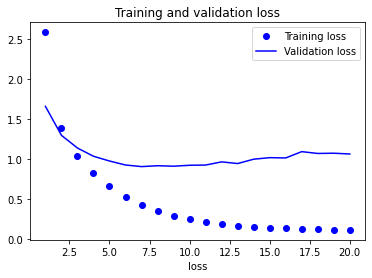

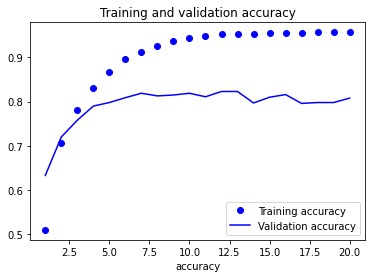

In [16]:
import matplotlib.pyplot as plt

def PrintHistory(history, function="loss"): #loss ou accuracy
    history_dict = history.history
    loss_values = history_dict[function]
    val_loss_values = history_dict["val_"+function]
    epochs = range(1, len(loss_values)+1)
    plt.plot(epochs, loss_values, "bo", label="Training "+function) #bo=blue o
    plt.plot(epochs, val_loss_values, "b", label="Validation "+function)
    plt.title("Training and validation "+function)
    plt.xlabel("Epochs")
    plt.xlabel(function)
    plt.legend()
    plt.show()

PrintHistory(history=history, function="loss")
PrintHistory(history=history, function="accuracy")

Epoch 1/100
16/16 [==============================] - 1s 59ms/step - loss: 2.5966 - accuracy: 0.5018 - val_loss: 1.7273 - val_accuracy: 0.6370
Epoch 2/100
16/16 [==============================] - 1s 43ms/step - loss: 1.4129 - accuracy: 0.7052 - val_loss: 1.3076 - val_accuracy: 0.7120
Epoch 3/100
16/16 [==============================] - 1s 44ms/step - loss: 1.0507 - accuracy: 0.7766 - val_loss: 1.1735 - val_accuracy: 0.7460
Epoch 4/100
16/16 [==============================] - 1s 45ms/step - loss: 0.8325 - accuracy: 0.8265 - val_loss: 1.0389 - val_accuracy: 0.7960
Epoch 5/100
16/16 [==============================] - 1s 46ms/step - loss: 0.6670 - accuracy: 0.8609 - val_loss: 0.9844 - val_accuracy: 0.7980
Epoch 6/100
16/16 [==============================] - 1s 45ms/step - loss: 0.5355 - accuracy: 0.8916 - val_loss: 0.9483 - val_accuracy: 0.8090
Epoch 7/100
16/16 [==============================] - 1s 45ms/step - loss: 0.4297 - accuracy: 0.9129 - val_loss: 0.9169 - val_accuracy: 0.8070
Epoch 

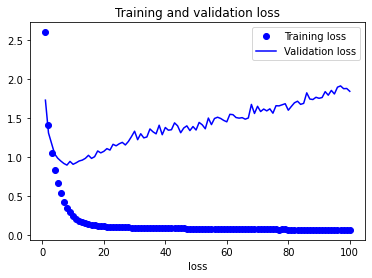

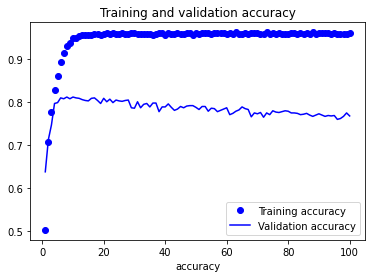

In [23]:
#treinando com 4 epochs

from tensorflow import keras
from keras import layers

model = keras.Sequential([layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#separando as bases de treino de validação
X_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=100, batch_size=512, 
                    validation_data=(X_val, y_val))

result = model.evaluate(X_test, y_test)
print(result)

PrintHistory(history=history, function="loss")
PrintHistory(history=history, function="accuracy")

Nesse ultimo caso, observamos que muitas épocas no treino provoca overffiting. Não adianta treinar demais, pois a função se superajusta aos dados.

Para parar no melhor momento, ou seja, quando a função comear a divergir muito é EarlyStop. A partir daí continuar treinando não adianta mais.